In [2]:
from binance.client import Client
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from scipy.stats import norm

#add the API Key
api_key = ''

#add the Secret Key
api_secret = ''
client = Client(api_key, api_secret)

In [30]:
#Interval of 4 hours with 1 min bars START: 11/01/2020 @ 9:00am (UTC)      END = 11/01/2020 @ 12:59pm (UTC)
ltcusdt = client.get_historical_klines(symbol= 'LTCUSDT', interval= Client.KLINE_INTERVAL_1MINUTE, start_str="1604221200",end_str = "1604235540")
ethbtc = client.get_historical_klines(symbol= 'ETHBTC', interval= Client.KLINE_INTERVAL_1MINUTE, start_str="1604221200",end_str = "1604235540")
xrpusdt = client.get_historical_klines(symbol= 'XRPUSDT', interval= Client.KLINE_INTERVAL_1MINUTE, start_str="1604221200",end_str = "1604235540")

In [31]:
#Saves the data of each pair in a Pandas Dataframe
df_one = pd.DataFrame(ltcusdt)
df_two = pd.DataFrame(ethbtc)
df_three = pd.DataFrame(xrpusdt)

# 1. TIME
### Scrapes the time out of the dataframe.

In [5]:
temp_date = df_one[0]
date = []

for time in temp_date.unique():
    reada = datetime.fromtimestamp(int(time/1000))
    date.append(reada)

time_df = pd.DataFrame(date)

# 2. PRICES

In [6]:
#Prices for LTCUSDT
ol_price_one = df_one[4]
prices_one = []

for i in ol_price_one:
    prices_one.append(float(i))
    
df_one_price = pd.DataFrame(prices_one)



#Price for ETHBTC
ol_price_two = df_two[4]
prices_two = []

for i in ol_price_two:
    prices_two.append(float(i))
    
df_two_price = pd.DataFrame(prices_two)



#Price for XRPUSDT
ol_price_three = df_three[4]
prices_three = []

for i in ol_price_three:
    prices_three.append(float(i))
    
df_three_price = pd.DataFrame(prices_three)

prices = pd.concat([df_one_price, df_two_price,df_three_price],axis =1)
prices.columns = ['LTCUSD Price', 'ETHBTC Price', 'XRPUSDT Price']




# 3. VOLUMES
#### Parsing the Volume of each pair.

In [7]:
#Volume for LTCUSDT
ol_volume_one = df_one[5]
volume_one = []

for i in ol_volume_one:
    volume_one.append(float(i))
df_one_volume = pd.DataFrame(volume_one)



#Volume for ETHBTC
ol_volume_two = df_two[5]
volume_two = []

for i in ol_volume_two:
    volume_two.append(float(i))
df_two_volume = pd.DataFrame(volume_two)


#Volume for XRPUSDT
ol_volume_three = df_three[5]
volume_three = []

for i in ol_volume_three:
    volume_three.append(float(i))
df_three_volume = pd.DataFrame(volume_three)

volumes = pd.concat([df_one_volume, df_two_volume,df_three_volume],axis =1)
volumes.columns = ['LTCUSD Volume', 'ETHBTC Volume', 'XRPUSDT Volume']

# 4. PCT change

In [8]:
#PCT CHNAGE LTCUSD
df_one['pct_change_LTCUSD'] = df_one_price.pct_change()
pct_change_one = df_one['pct_change_LTCUSD']
df_pct_change_one = pd.DataFrame(pct_change_one)


#PCT CHNAGE ETHBTC
df_two['pct_change_ETHBTC'] = df_two_price.pct_change()
pct_change_two = df_two['pct_change_ETHBTC']
df_pct_change_two = pd.DataFrame(pct_change_two)

#PCT CHNAGE XRPUSDT
df_three['pct_change_XRPUSDT'] = df_three_price.pct_change()
pct_change_three = df_three['pct_change_XRPUSDT']
df_pct_change_three = pd.DataFrame(pct_change_three)

pct = pd.concat([df_pct_change_one,df_pct_change_two, df_pct_change_three], axis = 1)


# 5. Log Return

In [9]:
#LOG Return for LTCUSD
df_one['log_ret_LTCUSD'] = np.log(df_one_price) - np.log(df_one_price.shift(1))
log_ret_one = df_one['log_ret_LTCUSD']
df_log_ret_one = pd.DataFrame(log_ret_one)

#LOG Return for ETHBTC
df_two['log_ret_ETHBTC'] = np.log(df_two_price) - np.log(df_two_price.shift(1))
log_ret_two = df_two['log_ret_ETHBTC']
df_log_ret_two = pd.DataFrame(log_ret_two)

#LOG Return for XRPUSDT
df_three['log_ret_XRPUSDT'] = np.log(df_three_price) - np.log(df_three_price.shift(1))
log_ret_three = df_three['log_ret_XRPUSDT']
df_log_ret_three = pd.DataFrame(log_ret_three)

# 6. Conacting the Data sets

In [10]:
first_pair = pd.concat([time_df, df_one_price, df_one_volume, df_pct_change_one, df_log_ret_one], axis = 1)
first_pair.columns = ['Time', 'Price', 'Volume', 'Pct Change', 'Log return']

second_pair = pd.concat([time_df, df_two_price, df_two_volume, df_pct_change_two, df_log_ret_two], axis = 1)
second_pair.columns = ['Time', 'Price', 'Volume', 'Pct Change', 'Log return']

third_pair = pd.concat([time_df, df_three_price, df_three_volume, df_pct_change_three, df_log_ret_three], axis = 1)
third_pair.columns = ['Time', 'Price', 'Volume', 'Pct Change', 'Log return']

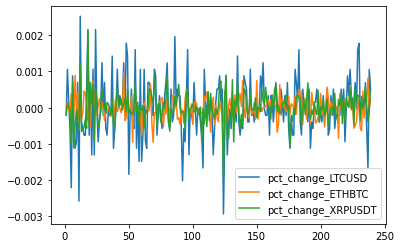

In [11]:
returns = pd.concat([df_pct_change_one,df_pct_change_two,df_pct_change_three],axis = 1)
returns = returns - returns.mean(skipna = True)
returns.plot()

In [12]:
#WEIGHTS 2
def scale(x):
    return x / np.sum(np.abs(x))

weights = scale(np.random.random(3))



# 7. Value at Risk

In [13]:
#200 is random for now
def value_at_risk(val_invest, returns, weights, alf = 0.95, lookback_mins = 80):
    returns = returns.fillna(0.0)
    port_returns = returns.iloc[-lookback_mins:].dot(weights)
    return np.percentile(port_returns, 100 * (1- alf )) * val_invest
    
val_risk = value_at_risk(1000, returns, weights,0.95)
val_risk

-0.4771939624129164

## 7.1 Plotting Value at Risk

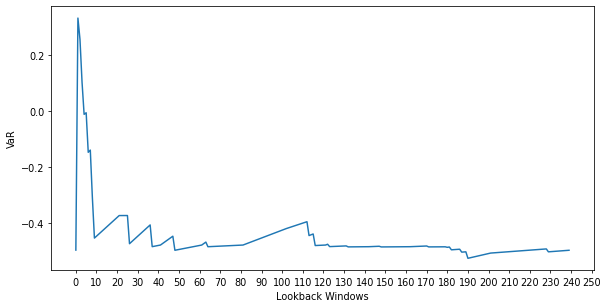

In [14]:
from matplotlib.pyplot import figure


N = 240#number of rows
VaRs = np.zeros((N,1))

for i in range(N):
    VaRs[i] = value_at_risk(1000,returns, weights, lookback_mins = i)

    
figure(num=None, figsize=(10, 5), dpi=70, facecolor='w', edgecolor='b')
plt.plot(VaRs)

plt.xticks(np.arange(251, step = 10))
plt.xlabel('Lookback Windows')
plt.ylabel('VaR');


# CVAR (ES)

In [15]:
def cvar (val_invest, returns, weights, alf = 0.95, lookback_mins = 80):
    var = value_at_risk(val_invest, returns, weights, alf = 0.95, lookback_mins = 80)
    returns = returns.fillna(0.0)
    port_returns = returns.iloc[-lookback_mins:].dot(weights)
    
    var_pct_loss = var / val_invest
    
    return val_invest * np.nanmean(port_returns[port_returns < var_pct_loss])

In [16]:
ES = cvar(1000, returns, weights, lookback_mins=80)
ES

-0.5518416140052123

## 8.1 Plotting Expected Shortfall

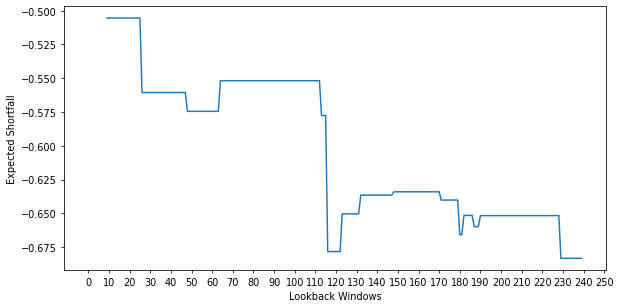

In [29]:
N = 240#number of rows
Es = np.zeros((N,1))

for i in range(N):
    Es[i] = cvar(1000,returns, weights, lookback_mins = i)

    
figure(num=None, figsize=(10, 5), dpi=70, facecolor='w', edgecolor='b')
plt.plot(Es)

plt.xticks(np.arange(251, step = 10))
plt.xlabel('Lookback Windows')
plt.ylabel('Expected Shortfall');

# TRYING MYSQL DB NOW

In [19]:
import pymysql
db = pymysql.connect('mytest.cgnjdy7cjkjg.us-east-2.rds.amazonaws.com','mainadmin','kitaraime')
cursor = db.cursor()
cursor

In [ ]:
#Creates the DataBase BlockChain
sql = '''create database BlockChain'''
cursor.execute(sql)

In [21]:
sql = '''use BlockChain'''
cursor.execute(sql)

0

In [22]:
cursor.connection.commit()

In [24]:
#Setting the first numbers of each pairs percentage change and log returns because their elements are 'nan'
import warnings
warnings.filterwarnings('ignore')
log_ret_one[0] = 0
pct_change_one[0] = 0
log_ret_two[0] = 0
pct_change_two[0] = 0
log_ret_three[0] = 0
pct_change_three[0] = 0

# LTCUSDT Table

In [254]:
sql = '''

create table Pair_one(

id int not null auto_increment, 

price JSON,
volume JSON,
pc JSON,
log JSON,
primary key(id)

); '''
cursor.execute(sql)

0

In [255]:
for p,v,c,l in zip( ol_price_one,ol_volume_one, pct_change_one, log_ret_one):
    
    pr = {"price" : p}
    vo = {"vol" : v}
    cc = {"pct": c}
    lr = {"lgr": l}
    
    
    prr = json.dumps(pr)
    voo = json.dumps(vo)
    ccc = json.dumps(cc)
    lrr = json.dumps(lr)
    
    sql = '''
    INSERT INTO Pair_one(price, volume, pc, log ) VALUES('%s', '%s', '%s', '%s')''' % (prr, voo, ccc, lrr)
    
    cursor.execute(sql)
    db.commit()

# ETHBTC Table

In [257]:
sql = '''

create table Pair_two(

id int not null auto_increment, 

price JSON,
volume JSON,
pc JSON,
log JSON,
primary key(id)

); '''
cursor.execute(sql)

0

In [258]:
for p,v,c,l in zip( ol_price_two,ol_volume_two, pct_change_two, log_ret_two):
    
    pr = {"price" : p}
    vo = {"vol" : v}
    cc = {"pct": c}
    lr = {"lgr": l}
    
    
    prr = json.dumps(pr)
    voo = json.dumps(vo)
    ccc = json.dumps(cc)
    lrr = json.dumps(lr)
    
    sql = '''
    INSERT INTO Pair_two(price, volume, pc, log ) VALUES('%s', '%s', '%s', '%s')''' % (prr, voo, ccc, lrr)
    
    cursor.execute(sql)
    db.commit()

# XRPUSDT Table

In [259]:
sql = '''

create table Pair_three(

id int not null auto_increment, 

price JSON,
volume JSON,
pc JSON,
log JSON,
primary key(id)

); '''
cursor.execute(sql)

0

In [260]:
for p,v,c,l in zip( ol_price_three,ol_volume_three, pct_change_three, log_ret_three):
    
    pr = {"price" : p}
    vo = {"vol" : v}
    cc = {"pct": c}
    lr = {"lgr": l}
    
    
    prr = json.dumps(pr)
    voo = json.dumps(vo)
    ccc = json.dumps(cc)
    lrr = json.dumps(lr)
    
    sql = '''
    INSERT INTO Pair_three(price, volume, pc, log ) VALUES('%s', '%s', '%s', '%s')''' % (prr, voo, ccc, lrr)
    
    cursor.execute(sql)
    db.commit()

# Result Table

In [27]:
sql = '''

create table Analysis_Result(

Value_at_Risk FLOAT,
Expected_Shortfall FLOAT
); '''
cursor.execute(sql)

0

In [28]:
sql = '''
    INSERT INTO Analysis_Result(Value_at_Risk, Expected_Shortfall) VALUES('%s', '%s')''' % (val_risk, ES)

cursor.execute(sql)
db.commit()